<a href="https://colab.research.google.com/github/sidharthofficial/h2oML/blob/main/H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=fb7a8fb051c1ed421e842bde7acfd1ab07ed0d483bbe4e727b96b2cc15d5ec4c
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [2]:
import h2o

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpd74p1z4a
  JVM stdout: /tmp/tmpd74p1z4a/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpd74p1z4a/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_prbsaj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
#importing H2OAutoML class
from h2o.automl import H2OAutoML

In [5]:
from google.colab import files

In [6]:
uploaded = files.upload()

Saving bank_marketing.csv to bank_marketing.csv


In [7]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "bank_marketing.csv" with length 4610348 bytes


In [8]:
# Load data into H2O
df = h2o.import_file("bank_marketing.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
df.head()

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [10]:
df.types

{'age': 'int',
 'job': 'enum',
 'marital': 'enum',
 'education': 'enum',
 'default': 'enum',
 'balance': 'int',
 'housing': 'enum',
 'loan': 'enum',
 'contact': 'enum',
 'day': 'int',
 'month': 'enum',
 'duration': 'int',
 'campaign': 'int',
 'pdays': 'int',
 'previous': 'int',
 'poutcome': 'enum',
 'y': 'enum'}

In [11]:
df.describe()

Rows:45211
Cols:17

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432838,,,,,1362.2720576850754,,,,15.80641879188693,,258.16307978146915,2.763840658246885,40.1978279622215,0.5803233726305537,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.61876204097543,,,,,3044.7658291685175,,,,8.322476153044585,,257.5278122651718,3.0980208832791676,100.12874599059826,2.303441044931224,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [12]:
print(f'Size of training set: {df.shape[0]} rows and {df.shape[1]}  columns')

Size of training set: 45211 rows and 17  columns


In [13]:
#Splitting the dataset into train and test datasets
splits = df.split_frame(ratios=[0.8], seed=1)
train = splits[0]
test = splits[1]

In [14]:
#Specifying the Response and Predictor variables
y = "y"
x = df.columns
x.remove(y)

In [15]:
aml = H2OAutoML(max_runtime_secs = 120, verbosity = "info")
aml.train(x = x, y = y, training_frame = train)

AutoML progress: |
08:33:56.523: Project: AutoML_1_20241107_83356
08:33:56.532: Blending will be used.
08:33:56.533: Setting stopping tolerance adaptively based on the training frame: 0.005253271837258799
08:33:56.533: Build control seed: -1 (random)
08:33:56.542: Since cross-validation is disabled, and validation, blending frame(s) were not provided, automatically split the training data into training, validation, blending frame(s) in the ratio 70/10/20.
08:33:56.814: training frame: Frame key: AutoML_1_20241107_83356_training_py_3_sid_a006    cols: 17    rows: 25289  chunks: 8    size: 402338  checksum: 507399966316584
08:33:56.824: validation frame: Frame key: AutoML_1_20241107_83356_validation_py_3_sid_a006    cols: 17    rows: 3694  chunks: 8    size: 95384  checksum: 117518448674352
08:33:56.824: leaderboard frame: Frame key: AutoML_1_20241107_83356_validation_py_3_sid_a006    cols: 17    rows: 3694  chunks: 8    size: 95384  checksum: 117518448674352
08:33:56.838: blending frame

key,value
Stacking strategy,blending
Number of base models (used / total),5/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0


In [16]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_4_AutoML_1_20241107_83356,0.938379,0.192584,0.630521,0.166029,0.246263,0.0606456
StackedEnsemble_BestOfFamily_3_AutoML_1_20241107_83356,0.937961,0.192724,0.631166,0.163499,0.246485,0.060755
StackedEnsemble_AllModels_2_AutoML_1_20241107_83356,0.937961,0.192724,0.631166,0.163499,0.246485,0.060755
StackedEnsemble_AllModels_1_AutoML_1_20241107_83356,0.937609,0.193552,0.628847,0.169364,0.246566,0.0607949
StackedEnsemble_BestOfFamily_2_AutoML_1_20241107_83356,0.937261,0.193687,0.629607,0.168502,0.246609,0.0608162
StackedEnsemble_BestOfFamily_1_AutoML_1_20241107_83356,0.936317,0.195248,0.630141,0.173215,0.246476,0.0607503
GBM_1_AutoML_1_20241107_83356,0.935836,0.19578,0.626851,0.155684,0.247397,0.0612055
GBM_3_AutoML_1_20241107_83356,0.935128,0.200451,0.614418,0.166698,0.250903,0.0629525
XGBoost_3_AutoML_1_20241107_83356,0.934249,0.200336,0.608386,0.159359,0.251311,0.0631572
GBM_5_AutoML_1_20241107_83356,0.933702,0.200824,0.614757,0.184534,0.250257,0.0626286


In [17]:
# GEt the model ids for all models in the AutoML leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [18]:
# get the All Models StackedEnsemble model
SE = h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

In [19]:
# Get the stacked Ensemble metalearner model
metalearner = h2o.get_model(SE.metalearner()['name'])

/usr/local/lib/python3.10/dist-packages/h2o/estimators/stackedensemble.py:965: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


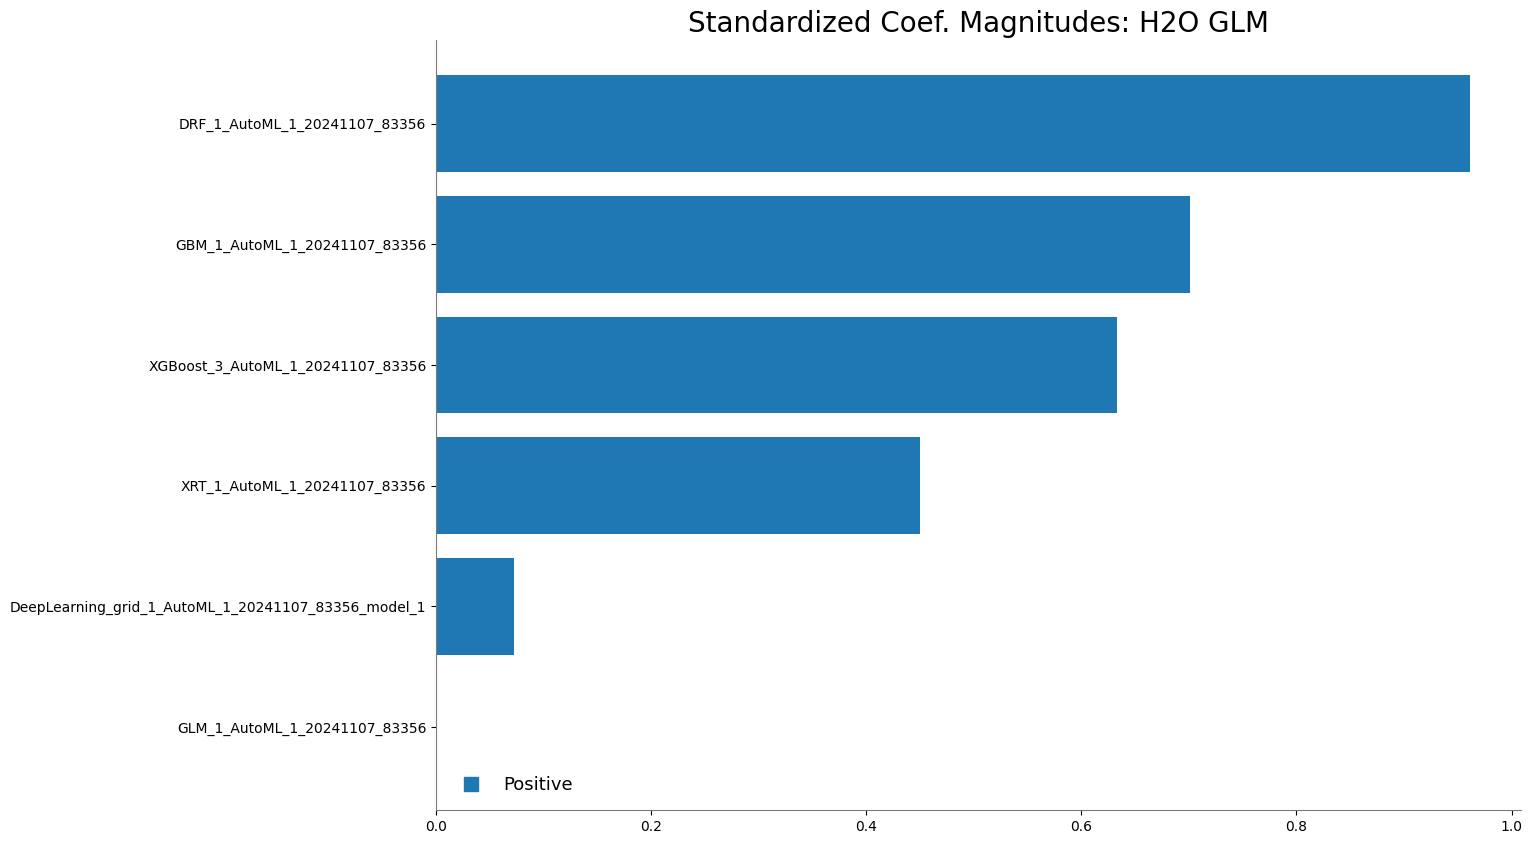

In [20]:
%matplotlib inline
metalearner.std_coef_plot()

In [21]:
SE.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_4_AutoML_1_20241107_83356',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_4_AutoML_1_20241107_83356'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241107_83356_training_py_3_sid_a006',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241107_83356_training_py_3_sid_a006'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241107_83356_training_py_3_sid_a006',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241107_83356_training_py_3_sid_a006'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'sch

In [22]:
SE

key,value
Stacking strategy,blending
Number of base models (used / total),5/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0


In [23]:
SE.confusion_matrix()

,no,yes,Error,Rate
no,8831.0,106.0,0.0119,(106.0/8937.0)
yes,185.0,939.0,0.1646,(185.0/1124.0)
Total,9016.0,1045.0,0.0289,(291.0/10061.0)


In [24]:
pred = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [25]:
pred.head()

predict,no,yes
no,0.99909,0.000909785
no,0.998403,0.00159747
no,0.99521,0.00478951
yes,0.672814,0.327186
no,0.997721,0.00227908
no,0.996781,0.00321867
no,0.986947,0.0130526
no,0.994159,0.0058411
no,0.986031,0.0139688
no,0.998259,0.00174064


In [26]:
aml.leader.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.060034966604709784
RMSE: 0.24502033916536353
LogLoss: 0.19162096840441067
AUC: 0.9410305795362554
AUCPR: 0.6573479151705768
Gini: 0.8820611590725107
Null degrees of freedom: 8974
Residual degrees of freedom: 8969
Null deviance: 6586.74075757781
Residual deviance: 3439.596382859171
AIC: 3451.596382859171

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3586112481187065
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     7406  492    0.0623   (492.0/7898.0)
yes    303   774    0.2813   (303.0/1077.0)
Total  7709  1266   0.0886   (795.0/8975.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.358611     0.660691  189
max f2                       0.15053      0.757219  273
max f0point5                 0.47446      0.644723  145
max accuracy                 0.47446      0.914206  145
max precision                0.961849     1         0
max recall                   0.000832059  1         397
max specificity              0.961849     1         0
max absolute_mcc             0.358611     0.612771  189
max min_per_class_accuracy   0.17247      0.872626  263
max mean_per_class_accuracy  0.147212     0.878682  275
max tns                      0.961849     7898      0
max fns                      0.961849     1076      0
max fps                      0.000177385  7898      399
max tps                      0.000832059  1077      397
max tnr                      0.961849     1         0
max fnr                      0.961849     0.999071  0
max fpr                      0.000177385  1         399
max tpr                      0.000832059  1         397

Gains/Lift Table: Avg response rate: 12.00 %, avg score: 12.29 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100279                   0.85299            7.12963     7.12963            0.855556         0.888698     0.855556                    0.888698            0.0714949       0.0714949                  612.963   612.963            0.0698489
2        0.0200557                   0.801273           5.55556     6.34259            0.666667         0.826195     0.761111                    0.857446            0.0557103       0.127205                   455.556   534.259            0.121761
3        0.0300836                   0.749501           6.48148     6.38889            0.777778         0.775927     0.766667                    0.830273            0.0649954       0.192201                   548.148   538.889            0.184224
4        0.04                        0.710014           5.99251     6.29062            0.719101         0.731453     0.754875                    0.805775            0.0594243       0.251625                   499.251   529.062            0.240483
5        0.0500279                   0.656501           5.55556     6.14328            0.666667         0.685191     0.737194                    0.781604            0.0557103       0.307335                   455.556   514.328            0.292395
6        0.100056                    0.483092           4.97402     5.55865            0.596882         0.566395     0.667038                    0.674               0.248839        0.556175                   397.402   455.865            0.518317
7        0.150084                    0.332927           3.61915     4.91215            0.434298       

In [27]:
# Save the model
h2o.save_model(aml.leader, path = "./")

'/content/StackedEnsemble_BestOfFamily_4_AutoML_1_20241107_83356'